# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests as rq

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
response = rq.get(url)
print(response.text)
bs = soup(response.text,'html.parser')


<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
            

In [5]:
# Extract all rows of data
bs.find('tr')
datarows = bs.find_all(class_ = 'data-row')
datarows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
datalist = []
# Loop through the scraped data to create a list of rows
for row in datarows :
    data = row.findChildren()
    print('id',data[0].text)
    temp_dict = {'id':data[0].text,
                'terrestrial_date':data[1].text,
                'sol':data[2].text,
                'ls':data[3].text,
                'month':data[4].text,
                'min_temp':data[5].text,
                'pressure':data[6].text}
#     for idx,el in enumerate(row.findChildren()) :
#         print(el)
    datalist.append(temp_dict)
print(datalist)

id 2
id 13
id 24
id 35
id 46
id 57
id 68
id 79
id 112
id 114
id 123
id 134
id 145
id 156
id 163
id 170
id 171
id 172
id 173
id 175
id 176
id 177
id 178
id 179
id 180
id 181
id 182
id 183
id 184
id 185
id 186
id 187
id 188
id 189
id 190
id 191
id 192
id 193
id 194
id 195
id 196
id 197
id 198
id 199
id 200
id 201
id 202
id 203
id 204
id 205
id 206
id 207
id 208
id 209
id 210
id 211
id 212
id 213
id 214
id 215
id 216
id 217
id 218
id 219
id 220
id 221
id 222
id 223
id 224
id 225
id 226
id 227
id 228
id 229
id 230
id 231
id 233
id 234
id 235
id 236
id 237
id 238
id 239
id 240
id 241
id 242
id 3
id 4
id 5
id 6
id 7
id 8
id 9
id 10
id 11
id 12
id 14
id 15
id 16
id 17
id 18
id 19
id 20
id 21
id 22
id 23
id 25
id 26
id 27
id 28
id 29
id 30
id 31
id 32
id 33
id 34
id 36
id 37
id 38
id 39
id 40
id 41
id 42
id 43
id 44
id 45
id 47
id 48
id 49
id 50
id 51
id 52
id 53
id 54
id 55
id 56
id 58
id 59
id 60
id 61
id 62
id 63
id 64
id 65
id 66
id 67
id 69
id 70
id 71
id 72
id 73
id 74
id 75
id 76
id 77


id 1820
id 1821
id 1822
id 1823
id 1824
id 1825
id 1826
id 1827
id 1828
id 1833
id 1832
id 1830
id 1834
id 1835
id 1829
id 1831
id 1839
id 1836
id 1837
id 1838
id 1840
id 1842
id 1841
id 1844
id 1843
id 1845
id 1847
id 1846
id 1848
id 1849
id 1850
id 1852
id 1851
id 1853
id 1855
id 1854
id 1859
id 1857
id 1858
id 1856
id 1860
id 1863
id 1861
id 1862
id 1864
id 1865
id 1866
id 1867
id 1868
id 1869
id 1871
id 1870
id 1872
id 1873
id 1879
id 1875
id 1874
id 1878
id 1876
id 1877
id 1880
id 1881
id 1882
id 1883
id 1884
id 1885
id 1886
id 1887
id 1888
id 1890
id 1891
id 1889
id 1892
id 1894
id 1893
id 1895
[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(datalist)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)
df['ls'] = df['ls'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)




In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
# 1. How many months are there on Mars?
df.groupby('month').count()['ls']

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: ls, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
df.shape[0]

1867

In [15]:
# 3. What is the average low temperature by month?
df.groupby('month').mean()['min_temp']

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_96329/4202719447.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['min_temp']


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_96329/3412302154.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(x = df['month'].unique(), height = df.groupby('month').mean()['min_temp'])


<BarContainer object of 12 artists>

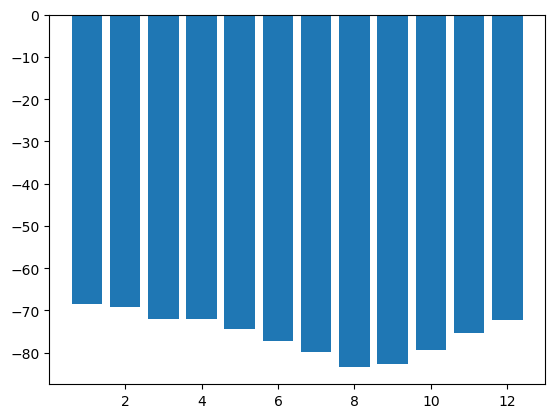

In [16]:
# Plot the average temperature by month
plt.bar(x = df['month'].unique(), height = df.groupby('month').mean()['min_temp'])

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_96329/3089078658.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_temps = df.groupby('month').mean()['min_temp'].sort_values()


<BarContainer object of 12 artists>

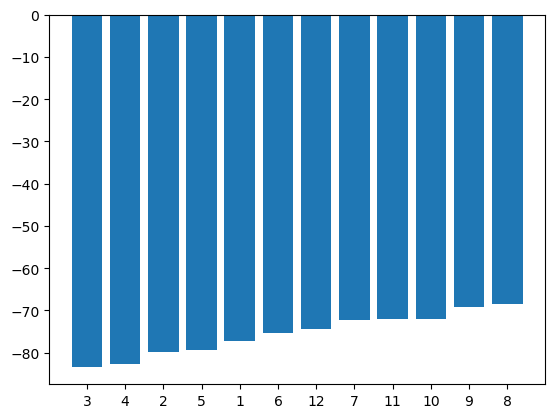

In [17]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temps = df.groupby('month').mean()['min_temp'].sort_values()
list(sorted_temps.index.astype(str))
plt.bar(x = list(sorted_temps.index.astype(str)), height = sorted_temps.values)

In [18]:
# 4. Average pressure by Martian month
df.groupby('month').mean()['pressure']


/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_96329/1290582395.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['pressure']


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

/var/folders/31/0zrggm_d0dx3plbvqmkym84m0000gn/T/ipykernel_96329/4062781310.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_pressure = df.groupby('month').mean()['pressure'].sort_values()


<BarContainer object of 12 artists>

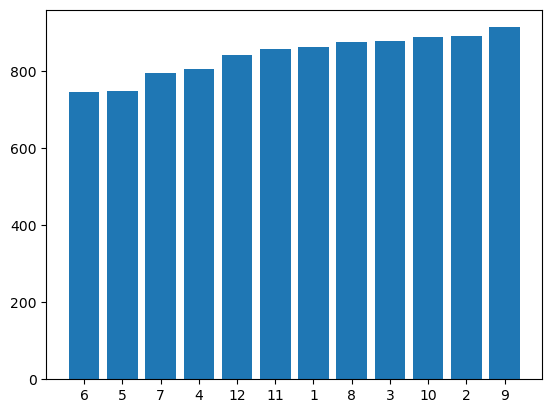

In [19]:
# Plot the average pressure by month
month_pressure = df.groupby('month').mean()['pressure'].sort_values()
plt.bar(x = month_pressure.index.astype(str),height = month_pressure.values)

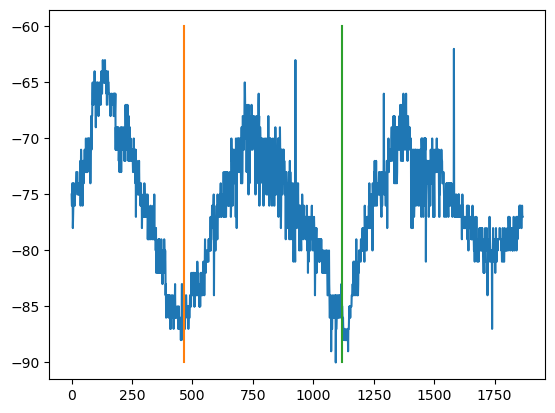

1119

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
first_min = min(df['min_temp'].iloc[250:750])
first_index = int(df[df['min_temp']==first_min].iloc[0].id)
second_min = min(df['min_temp'].iloc[750:1250])
second_index = int(df[df['min_temp']==second_min].iloc[0].id)
plt.plot(df.index,  df['min_temp'])
plt.plot([first_index,first_index],[-90,-60])
plt.plot([second_index,second_index],[-90,-60])
plt.show()
second_index

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv('MarsData.csv')

In [ ]:
browser.quit()